In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

c:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Futu

1.13.2


In [17]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [18]:
train_images[:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [19]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [21]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


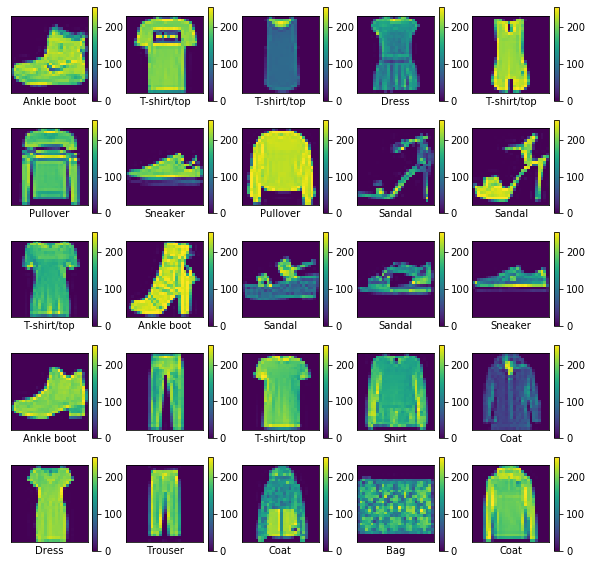

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 데이터 전처리
- 정규화 : 픽셀을 0~1사이로 조정

In [24]:
train_images = train_images / 255.
test_images = test_images / 255.

In [25]:
train_images[8:10]

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.15294118,
         0.00392157, 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.93333333,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.51372549,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.02745098,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.03529412, 0.        ],
        [0. 

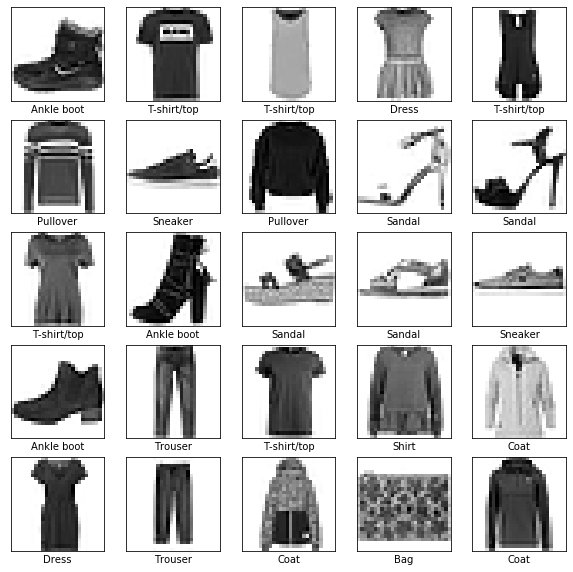

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


### tensorflow 2.x
```
model = keras.Sequentail([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation ='relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
```
- Flatten은 (28, 28)을 28*28로 펼쳐놓음
- Dense를 통해 Fully Connected층으로 128개 노드로 28*28의 input을 연결시킴
- 마지막 층에는 우리가 예측하고자 하는 10개의 라벨로 softmax를 통해 확률을 출력

## 모델 컴파일
- 손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
- 옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
- 지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [34]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 모델 훈련

In [36]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2824 - acc: 0.8953
Epoch 2/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2708 - acc: 0.9002
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2602 - acc: 0.9039
Epoch 4/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2511 - acc: 0.9060
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2433 - acc: 0.9091
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2332 - acc: 0.9126
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2265 - acc: 0.9157
Epoch 8/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2196 - acc: 0.9178
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2122 - acc: 0.9208
Epoch 10/10
60000/60000 [==============================] - 5s 81us/sample - loss: 

## 모델 평가
- model.evaluate(image, label, verbose=X)
- loss랑 accuracy로 출력됨
- verbose 0:평가과정결과 표시 X, 1:평가과정 표시 0, 2:평가결과만 표시

In [50]:
eval = model.evaluate(test_images, test_labels, verbose=1)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3382 - acc: 0.8836


In [48]:
test_loss, test_acc = eval

## 예측 모델 만들기
- model.predict(image)

In [51]:
predictions = model.predict(test_images)

In [52]:
predictions[0]

array([3.8191672e-11, 1.4365241e-11, 1.5582827e-11, 4.0806685e-12,
       1.5091357e-11, 4.7455087e-05, 7.5837630e-09, 2.2672355e-02,
       8.5942913e-11, 9.7728026e-01], dtype=float32)

In [60]:
# np.argmax를 통해 가장 높은 값의 인덱스 출력
pred=np.argmax(predictions[0])

In [56]:
if test_labels[0]==pred:
    print("맞습니다.")

맞습니다.


In [58]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

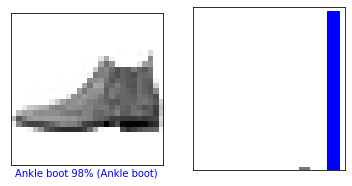

In [59]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

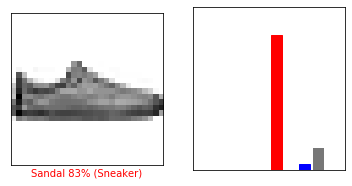

In [61]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

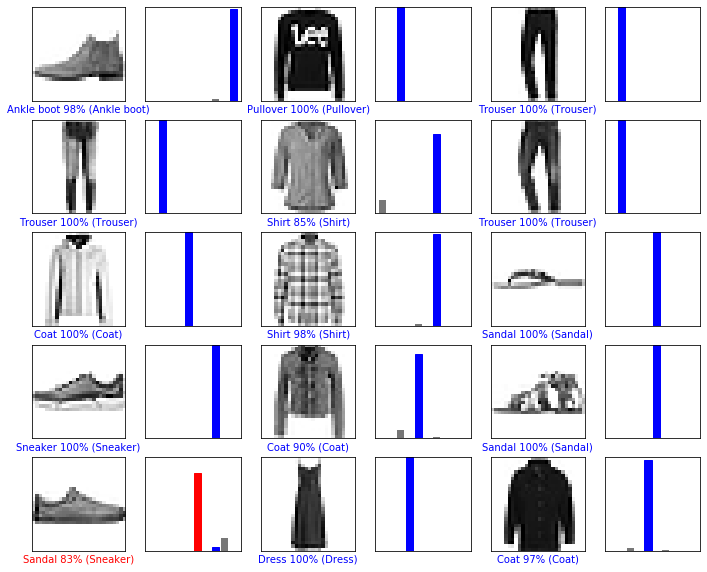

In [63]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

## 실제 모델 적용 시,
- 이미지 하나를 28*28로 resize하고
- 그 이미지를 예측할 때,

In [69]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


- shape이 (w, h)인 것을 알수 있다.
- 그러나 우리는 배치로 예측하도록 되어 있어, (batch, w, h)로 배열을 만들어 줘야 한다.
- np.expand_dims(이미지, axis)  * axis 늘릴 차원 인덱스

In [70]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))
# (1, 28, 28)
# img = (np.expand_dims(img,1))
# (28, 1, 28)
print(img.shape)

(1, 28, 28)


In [76]:
predictions_single = model.predict(img)

print(predictions_single)

print("예측된 레이블은:", np.argmax(predictions_single[0]))

[[3.8191603e-11 1.4365214e-11 1.5582827e-11 4.0806685e-12 1.5091298e-11
  4.7455087e-05 7.5837630e-09 2.2672346e-02 8.5942746e-11 9.7728026e-01]]
예측된 레이블은: 9


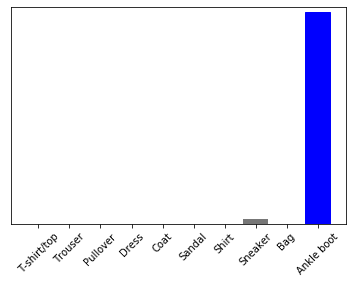

In [74]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)